100
After Epoch = 0; Current Training Loss = 0.40835081034837023; Current Validation Loss = 0.2983808031356544
After Epoch = 1; Current Training Loss = 0.3798357727255258; Current Validation Loss = 0.2758899588403166
After Epoch = 2; Current Training Loss = 0.3650606198333219; Current Validation Loss = 0.26129445306012444
After Epoch = 3; Current Training Loss = 0.3531134126728839; Current Validation Loss = 0.25070739548533205
After Epoch = 4; Current Training Loss = 0.34343472116328855; Current Validation Loss = 0.2426806922782006
After Epoch = 5; Current Training Loss = 0.33540476540643605; Current Validation Loss = 0.23639774620626736
After Epoch = 6; Current Training Loss = 0.32860374445970764; Current Validation Loss = 0.23135148082383242
After Epoch = 7; Current Training Loss = 0.3227479504511813; Current Validation Loss = 0.22721215182981397
After Epoch = 8; Current Training Loss = 0.31764050753311157; Current Validation Loss = 0.22375798873024602
After Epoch = 9; Current Traini

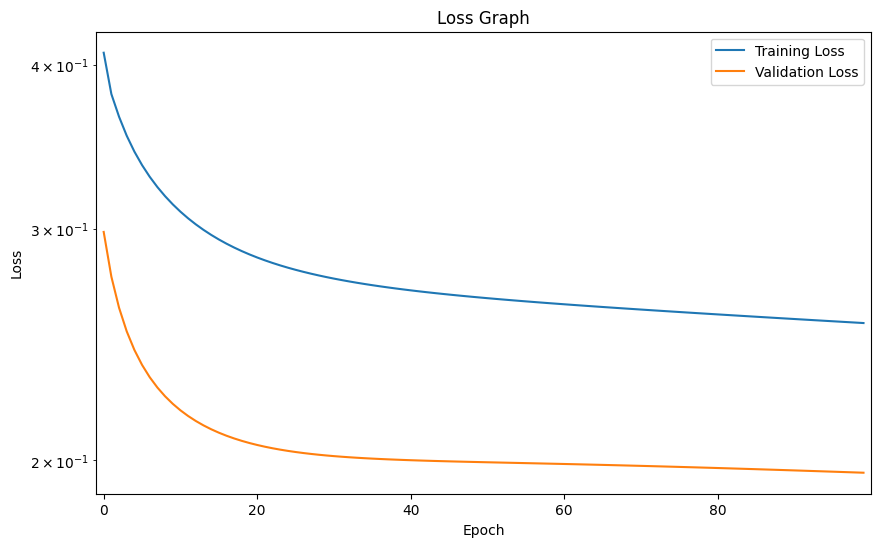

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

trainingArr = pd.read_csv('./train-1.csv')
testArr = pd.read_csv('./test.csv')
#getting the y_row of the testArr
x_test = testArr.drop('arousal', axis = 1)
y_test = testArr['arousal']

x_test = x_test.values.tolist()
y_test = y_test.values.tolist()
print(len(y_test))

# seperating x and y values accordingly and initializing values needed later
X_train = trainingArr.drop('arousal', axis=1)
y_train = trainingArr['arousal']
weights = [0] * 68
learningRate = 0.0000000005
epochs = 100

#splitting into validation and test set with a 9:1 ratio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=45) 
X_train = X_train.values.tolist()
X_val = X_val.values.tolist()
y_train = y_train.values.tolist()
y_val = y_val.values.tolist()
training_loss_history = []
validation_loss_history = []

for epoch in range(epochs):   
    loss = 0
    validation_loss = 0  
    for i in range(len(X_train)):
        X_row = X_train[i]
        # predicted value based on current weights
        y_hat = np.dot(weights, X_row) 
        loss += ((y_train[i] - y_hat) ** 2) 
    
        for j in range(len(weights)):
            gradient = -2 * (y_train[i] - y_hat) * X_row[j]
            weights[j] -= learningRate * gradient
        
    for i in range(len(X_val)):
            X_row = X_val[i]
            y_hat = np.dot(weights, X_row) 
            validation_loss += ((y_val[i] - y_hat) ** 2) 
        

    #adding avgLoss into my trainingLoss array
    avg_loss = loss / len(X_train)
    training_loss_history.append(avg_loss)

    #finding loss of the validation set
    avg_validation_loss = validation_loss / len(X_val)
    validation_loss_history.append(avg_validation_loss)
    
    
    print(f"After Epoch = {epoch}; Current Training Loss = {avg_loss}; Current Validation Loss = {avg_validation_loss}")

#Calculating and Printing the final loss based on the test data set.
testSet_loss = 0 
for i in range(len(x_test)):
    X_row = x_test[i]
    y_hat = np.dot(weights, X_row) 
    testSet_loss += ((y_test[i] - y_hat) ** 2) 
avg_final_loss = testSet_loss / len(x_test)
print(f"\n\nFINAL LOSS WITH TEST DATA SET: {avg_final_loss}")

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), training_loss_history, label = 'Training Loss')
plt.plot(range(epochs), validation_loss_history, label = 'Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Add some styling to make it more readable
plt.yscale('log')  # Use log scale if loss values vary widely
plt.margins(x=0.01)  # Reduce horizontal margins
plt.show()
            